# Roboflowからのデータのダウンロード

In [1]:
!pip install roboflow | tail -n 1

In [2]:
ROBOFLOW_API_KEY = "nFqrDKf6VtmfZPJ0pwdL"

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("bismillah-eoen6").project("train2_tugas-akhir")
version = project.version(9)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Train2_Tugas-Akhir-9 in yolov11:: 100%|██████████| 30714/30714 [00:06<00:00, 4467.40it/s]


# データの確認

In [4]:
import os
import sys
import matplotlib.pyplot as plt

Roboflowからダウンロードすると `./Train2_Tugas-Akhir-9` 下にデータが格納される．解凍済み．

In [5]:
!ls

sample_data  Train2_Tugas-Akhir-9


directory 名が煩いので，`dataset` に変更．

In [6]:
!mv Train2_Tugas-Akhir-9 dataset

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

テストで画像を表示．

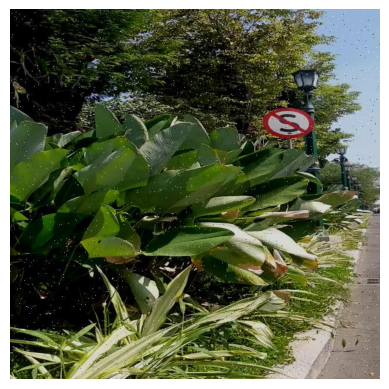

In [8]:
filepath_head = "/content/dataset/test/images"
filepaths = os.listdir(filepath_head)
for filepath in filepaths:
    if filepath[:5] == "11-2-":
        img = mpimg.imread(os.path.join(filepath_head, filepath))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

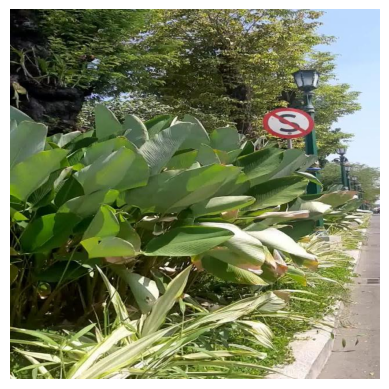

In [9]:
filepath_head = "/content/dataset/train/images"
filepaths = os.listdir(filepath_head)
for filepath in filepaths:
    if filepath[:5] == "11-2-":
        img = mpimg.imread(os.path.join(filepath_head, filepath))
        plt.imshow(img)
        plt.axis('off')
        plt.show()


# ラベル名の英語化・日本語化

In [10]:
labelname_en = [
    "First Aid Station",
    "Children Area",
    "Winding Road Right",
    "Winding Road Left",
    "Stop",
    "No Right Turn",
    "No Left Turn",
    "No Stopping",
    "No Entry",
    "No Overtaking",
    "No Parking",
    "No U-Turn",
    "Church",
    "Caution",
    "Roundabout",
    "Bicycle Lane",
    "Max Speed 30",
    "Max Speed 40",
    "Left Lane",
    "Traffic Light",
    "Weight Limit 10t",
    "Mosque",
    "Bus Stop",
    "Pedestrian Crossing",
    "Railroad Crossing",
    "Crosswalk Required",
    "T-Junction Priority",
    "T-Junction Right Priority",
    "T-Junction Left Priority",
    "T-Junction Left",
    "Crossroad",
    "Choose One Lane",
    "Speed Bump",
    "Gas Station",
    "U-Turn",
    "Hospital",
    "Parking Area",
    "Double Curve Right",
    "Double Curve Left",
    "Right Turn"
]

In [11]:
labelname_ja = [
    "応急処置所",
    "子ども注意",
    "右カーブあり",
    "左カーブあり",
    "一時停止",
    "右折禁止",
    "左折禁止",
    "停止禁止",
    "進入禁止",
    "追い越し禁止",
    "駐車禁止",
    "転回禁止",
    "教会",
    "注意",
    "ラウンドアバウト",
    "自転車専用通行帯",
    "最高速度30km/h",
    "最高速度40km/h",
    "左車線",
    "信号機あり",
    "重量制限10t",
    "モスク",
    "バス停",
    "横断歩道",
    "踏切注意",
    "横断指示",
    "優先T字路",
    "右優先T字路",
    "左優先T字路",
    "左方向T字路",
    "十字路",
    "いずれかの車線選択",
    "減速帯",
    "ガソリンスタンド",
    "転回可",
    "病院",
    "駐車場",
    "二重カーブ右",
    "二重カーブ左",
    "右カーブ"
]

In [12]:
num_to_lab_en = {i: labelname_en[i] for i in range(len(labelname_en))}
num_to_lab_ja = {i: labelname_ja[i] for i in range(len(labelname_ja))}

In [13]:
len(labelname_en)

40

In [14]:
len(labelname_ja)

40

# directory 構成の変更

とりあえず，すべてのデータを `./dataset/images`, `./dataset/labels` に格納しなおす．

In [15]:
!pwd

/content


In [16]:
!mkdir ./dataset/images

In [17]:
!mkdir ./dataset/labels

In [18]:
!mv ./dataset/train/images/* ./dataset/images

In [19]:
!mv ./dataset/valid/images/* ./dataset/images

In [20]:
!mv ./dataset/train/labels/* ./dataset/labels

In [21]:
!mv ./dataset/valid/labels/* ./dataset/labels

In [22]:
!rm -r ./dataset/train

In [23]:
!rm -r ./dataset/valid

In [24]:
!mv ./dataset/test/images/* ./dataset/images

In [25]:
!mv ./dataset/test/labels/* ./dataset/labels

In [26]:
!rm -r ./dataset/test

In [27]:
nameheads = [filepath.split(".rf.")[0] for filepath in os.listdir("./dataset/images")]
for namehead in nameheads:
    print(namehead)

24-83-_jpg
23-45-_jpg
24-106-_jpg
W1-3-L-151-_png_jpg
23-93-_jpg
27-113-_jpg
30-22-_jpg
W1-5-L-283-_png_jpg
larangan-belok-kiri-47-_jpg
21-14-_jpg
26-22-_jpg
8-150-_jpg
27-80-_jpg
22-89-_jpg
10-111-_jpg
20-72-_jpg
27-89-_jpg
25-121-_jpg
7-110-_jpg
22-90-_jpg
24-155-_jpg
W1-2-L-90-_png_jpg
12-41-_jpg
26-114-_jpg
22-14-_jpg
W1-5-L-33-_png_jpg
21-84-_jpg
5-23-_jpg
18-47-_jpg
21-2-_jpg
11-7-_jpg
6-84-_jpg
4-80-_jpg
30-119-_jpg
18-117-_jpg
23-67-_jpg
23-109-_jpg
27-104-_jpg
W1-3-L-18-_png_jpg
2-73-_jpg
1-152-_jpg
15-98-_jpg
13-89-_jpg
9-154-_jpg
30-81-_jpg
20-127-_jpg
12-136-_jpg
29-54-_jpg
W1-5-L-21-_png_jpg
peringatan-pintu-perlintasan-kereta-api-48-_jpg
W1-3-L-99-_png_jpg
larangan-belok-kiri-22-_jpg
16-31-_jpg
17-125-_jpg
13-136-_jpg
12-135-_jpg
28-100-_jpg
IMG20240411085413-Copy_jpg
10-28-_jpg
5-45-_jpg
c-159-_jpg
6-48-_jpg
21-111-_jpg
26-72-_jpg
1-124-_jpg
1-139-_jpg
1-148-_jpg
1-8-_jpg
14-46-_jpg
IMG20240411090144-Copy-2-_jpg
25-105-_jpg
27-58-_jpg
27-25-_jpg
18-130-_jpg
23-64-_jpg
17

In [28]:
len(nameheads)

15351

In [29]:
from collections import Counter

In [30]:
Counter(nameheads)

Counter({'24-83-_jpg': 3,
         '23-45-_jpg': 3,
         '24-106-_jpg': 3,
         'W1-3-L-151-_png_jpg': 1,
         '23-93-_jpg': 3,
         '27-113-_jpg': 3,
         '30-22-_jpg': 3,
         'W1-5-L-283-_png_jpg': 1,
         'larangan-belok-kiri-47-_jpg': 3,
         '21-14-_jpg': 3,
         '26-22-_jpg': 3,
         '8-150-_jpg': 3,
         '27-80-_jpg': 1,
         '22-89-_jpg': 3,
         '10-111-_jpg': 3,
         '20-72-_jpg': 3,
         '27-89-_jpg': 3,
         '25-121-_jpg': 3,
         '7-110-_jpg': 1,
         '22-90-_jpg': 1,
         '24-155-_jpg': 3,
         'W1-2-L-90-_png_jpg': 1,
         '12-41-_jpg': 3,
         '26-114-_jpg': 1,
         '22-14-_jpg': 3,
         'W1-5-L-33-_png_jpg': 1,
         '21-84-_jpg': 3,
         '5-23-_jpg': 3,
         '18-47-_jpg': 3,
         '21-2-_jpg': 3,
         '11-7-_jpg': 3,
         '6-84-_jpg': 3,
         '4-80-_jpg': 3,
         '30-119-_jpg': 3,
         '18-117-_jpg': 3,
         '23-67-_jpg': 3,
         '

# データリーダーの構築

扱いたいファイルが `./dataset/images/A.jpg` である時，
```python
x = LabeledImage("A")
```
とし，
```python
x.show_image()
```
で画像を表示，
```python
x.show_labels()
```
でラベルを表示
```python
x.show_all()
```
で画像とラベルを並べて表示し，さらに
```python
x.show_all(draw_boxes=True)
```
でバウンディングボックスも表示．

In [31]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd


In [32]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

class LabeledImage:
    def __init__(self, name):
        self.name = name
        self.image_path = f'./dataset/images/{name}.jpg'
        self.label_path = f'./dataset/labels/{name}.txt'

        if not os.path.exists(self.image_path):
            raise FileNotFoundError(f"Image not found: {self.image_path}")
        if not os.path.exists(self.label_path):
            raise FileNotFoundError(f"Label file not found: {self.label_path}")

    def show_image(self):
        img = Image.open(self.image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Image: {self.name}.jpg')
        plt.show()

    def show_labels(self):
        df = self._load_labels_dataframe()
        print(f'Labels for {self.name}.txt (YOLO format):')
        display(df)

    def show_all(self, draw_boxes=False):
        """Display image and label table side by side, with optional bounding boxes."""
        df = self._load_labels_dataframe()
        df_T = df.T

        fig, axs = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'width_ratios': [1, 1.1]})

        # Load image
        img = Image.open(self.image_path)
        axs[0].imshow(img)
        axs[0].axis('off')
        axs[0].set_title(f'Image: {self.name}.jpg', fontsize=12)

        # Optionally draw bounding boxes
        if draw_boxes and not df.empty and 'x_center' in df.columns:
            width, height = img.size
            for _, row in df.iterrows():
                try:
                    xc = float(row['x_center']) * width
                    yc = float(row['y_center']) * height
                    w = float(row['width']) * width
                    h = float(row['height']) * height
                    xmin = xc - w / 2
                    ymin = yc - h / 2
                    rect = patches.Rectangle((xmin, ymin), w, h,
                                             linewidth=2, edgecolor='red', facecolor='none')
                    axs[0].add_patch(rect)
                    axs[0].text(xmin, ymin - 5, str(row['Label']),
                                color='red', fontsize=10, backgroundcolor='white')
                except Exception as e:
                    continue  # skip invalid rows

        # Right: label table
        axs[1].axis('off')
        axs[1].set_title(f'Labels: {self.name}.txt', fontsize=12)

        table = axs[1].table(
            cellText=df_T.values,
            rowLabels=df_T.index,
            colLabels=df_T.columns,
            loc='center',
            cellLoc='center',
            colLoc='center',
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.1, 1.3)

        plt.tight_layout()
        plt.show()

    def _load_labels_dataframe(self):
        """Load labels from YOLO-format text file into a DataFrame."""
        with open(self.label_path, 'r') as f:
            lines = f.readlines()

        data = []
        if lines:
            for i, line in enumerate(lines, start=1):
                parts = line.strip().split()
                if len(parts) == 5:
                    label, x, y, w, h = parts
                    data.append({
                        'Line': i,
                        'Label': label,
                        'x_center': x,
                        'y_center': y,
                        'width': w,
                        'height': h
                    })
                else:
                    data.append({
                        'Line': i,
                        'Label': '[invalid]',
                        'x_center': '',
                        'y_center': '',
                        'width': '',
                        'height': line.strip() or '[empty]'
                    })
        else:
            data.append({
                'Line': '-',
                'Label': '[no label]',
                'x_center': '', 'y_center': '', 'width': '', 'height': ''
            })

        return pd.DataFrame(data)


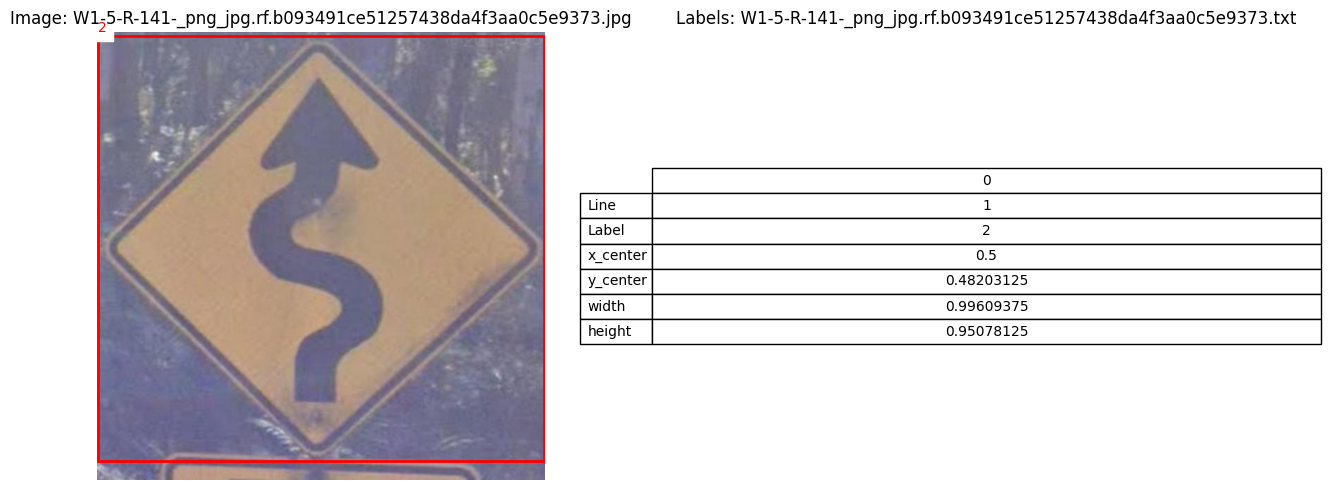

In [33]:
x = LabeledImage("W1-5-R-141-_png_jpg.rf.b093491ce51257438da4f3aa0c5e9373")
x.show_all(draw_boxes=True)

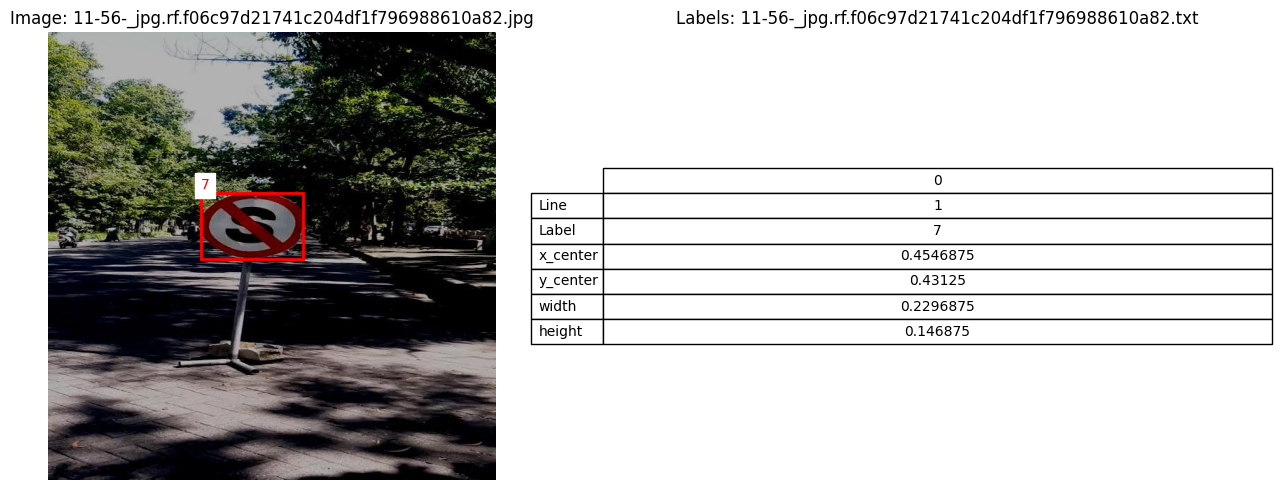

In [34]:
y = LabeledImage("11-56-_jpg.rf.f06c97d21741c204df1f796988610a82")
y.show_all(draw_boxes=True)

In [35]:
x = LabeledImage("11-134-_jpg.rf.838fafe9d4d84567bb0c7a8ea9c15c7e")

In [36]:
x.show_labels()

Labels for 11-134-_jpg.rf.838fafe9d4d84567bb0c7a8ea9c15c7e.txt (YOLO format):


,Line,Label,x_center,y_center,width,height
0,1,7,0.6390625,0.3203125,0.13125,0.075


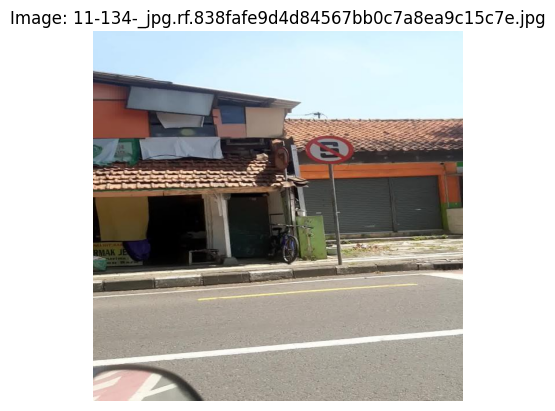

In [37]:
x.show_image()

# 画像の切り出しデータの作成．

In [38]:
from tqdm import tqdm

In [39]:
import os
import cv2
import glob
import shutil
import random
from collections import defaultdict

# 設定
image_dir = "./dataset/images"
label_dir = "./dataset/labels"
output_base = "./dataset"
splits = ['train', 'val', 'test']
split_ratio = [0.7, 0.2, 0.1]
output_size = (100, 100)
class_digits = 2
id_digits = 3

# ディレクトリ作成
for split in splits:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

# データ収集
image_paths = sorted(glob.glob(os.path.join(image_dir, "*.jpg")))
label_paths = {os.path.splitext(os.path.basename(p))[0]: p for p in glob.glob(os.path.join(label_dir, "*.txt"))}

# 分割
random.seed(42)
random.shuffle(image_paths)
split_points = [int(len(image_paths) * sum(split_ratio[:i+1])) for i in range(len(split_ratio))]
split_image_lists = [
    image_paths[:split_points[0]],
    image_paths[split_points[0]:split_points[1]],
    image_paths[split_points[1]:]
]

# クラスごとのカウンター
class_id_counter = defaultdict(int)

# データ処理
for split, images in zip(splits, split_image_lists):
    for image_path in images:
        base = os.path.splitext(os.path.basename(image_path))[0]
        label_path = label_paths.get(base)
        if not label_path:
            continue

        img = cv2.imread(image_path)
        height, width = img.shape[:2]

        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x_center, y_center, w, h = map(float, parts)
            cls = int(cls)
            cls_str = str(cls + 1).zfill(class_digits)  # 01, 02, ...

            # バウンディングボックス → ピクセル座標
            x1 = int((x_center - w / 2) * width)
            y1 = int((y_center - h / 2) * height)
            x2 = int((x_center + w / 2) * width)
            y2 = int((y_center + h / 2) * height)

            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(width, x2)
            y2 = min(height, y2)

            cropped = img[y1:y2, x1:x2]
            if cropped.size == 0:
                continue

            # リサイズ
            resized = cv2.resize(cropped, output_size)

            # 保存用ファイル名
            class_id_counter[cls_str] += 1
            file_id = str(class_id_counter[cls_str]).zfill(id_digits)
            filename = f"img{cls_str}{file_id}.jpg"

            save_dir = os.path.join(output_base, split, cls_str)
            os.makedirs(save_dir, exist_ok=True)
            cv2.imwrite(os.path.join(save_dir, filename), resized)

# 機械学習モデルのトレーニング

In [46]:
!pip install torch torchvision | tail -n 1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 856.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [48]:
import os
import random
from PIL import Image
from collections import defaultdict

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models


In [49]:
class TripletDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.class_to_images = defaultdict(list)
        self.image_paths = []

        for class_dir in sorted(os.listdir(root_dir)):
            class_path = os.path.join(root_dir, class_dir)
            if os.path.isdir(class_path):
                images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
                self.class_to_images[class_dir].extend(images)
                self.image_paths.extend(images)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        anchor_path = self.image_paths[idx]
        anchor_class = os.path.basename(os.path.dirname(anchor_path))

        # Positive sample (same class, different image)
        positive_path = random.choice([
            p for p in self.class_to_images[anchor_class] if p != anchor_path
        ])

        # Negative sample (different class)
        negative_class = random.choice([
            c for c in self.class_to_images if c != anchor_class
        ])
        negative_path = random.choice(self.class_to_images[negative_class])

        anchor = Image.open(anchor_path).convert("RGB")
        positive = Image.open(positive_path).convert("RGB")
        negative = Image.open(negative_path).convert("RGB")

        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative


In [50]:
class EmbeddingNet(nn.Module):
    def __init__(self, embedding_dim=128):
        super().__init__()
        base_model = models.mobilenet_v3_small(pretrained=True)
        self.features = base_model.features
        self.avgpool = base_model.avgpool
        self.embedding = nn.Sequential(
            nn.Linear(576, embedding_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x).view(x.size(0), -1)
        x = self.embedding(x)
        return x


In [53]:
from tqdm.notebook import tqdm  # ← Colabでは notebook 用 tqdm を推奨

def train(model, dataloader, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        print(f"\nEpoch {epoch+1}/{epochs}")
        for anchor, positive, negative in tqdm(dataloader, desc=f"Training", leave=False):
            anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)

            anchor_emb = model(anchor)
            positive_emb = model(positive)
            negative_emb = model(negative)

            loss = criterion(anchor_emb, positive_emb, negative_emb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"  → Loss: {total_loss:.4f}")


In [ ]:
# ディレクトリのパス（必要に応じて変更）
dataset_dir = "/content/dataset/train"

# 設定
batch_size = 32
embedding_dim = 128
epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 画像前処理
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor()
])

# データセット・ローダー準備
dataset = TripletDataset(dataset_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# モデル・損失・最適化
model = EmbeddingNet(embedding_dim=embedding_dim).to(device)
criterion = nn.TripletMarginLoss(margin=1.0, p=2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 学習
train(model, dataloader, criterion, optimizer, device, epochs=epochs)


In [55]:
import torch.nn.functional as F

def cosine_similarity(a, b):
    # a: (embedding_dim,)
    # b: (N, embedding_dim)
    a = a.unsqueeze(0)  # → (1, D)
    b = F.normalize(b, dim=1)
    a = F.normalize(a, dim=1)
    return torch.mm(a, b.T).squeeze(0)  # → (N,)

In [56]:
def extract_embeddings(model, root_dir, transform, device):
    model.eval()
    image_paths = []
    embeddings = []

    with torch.no_grad():
        for class_dir in sorted(os.listdir(root_dir)):
            class_path = os.path.join(root_dir, class_dir)
            if not os.path.isdir(class_path):
                continue

            for img_file in sorted(os.listdir(class_path)):
                img_path = os.path.join(class_path, img_file)
                image = Image.open(img_path).convert("RGB")
                image = transform(image).unsqueeze(0).to(device)
                embedding = model(image).squeeze(0).cpu()
                embeddings.append(embedding)
                image_paths.append(img_path)

    embeddings = torch.stack(embeddings)  # (N, D)
    return image_paths, embeddings


# テスト

In [57]:
import matplotlib.pyplot as plt

def show_similar_images(query_path, top_paths, scores):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    # Query
    query_img = Image.open(query_path).convert("RGB")
    axes[0].imshow(query_img)
    axes[0].set_title("Query")
    axes[0].axis('off')

    for i in range(3):
        img = Image.open(top_paths[i]).convert("RGB")
        axes[i+1].imshow(img)
        axes[i+1].set_title(f"Top {i+1}\n{scores[i]:.3f}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
# ディレクトリ
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

# ベクトル化用 transform
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor()
])

# train画像をベクトル化して保存
train_paths, train_embeddings = extract_embeddings(model, train_dir, transform, device)

# テスト画像に対する検索
model.eval()
with torch.no_grad():
    for class_dir in sorted(os.listdir(test_dir)):
        class_path = os.path.join(test_dir, class_dir)
        if not os.path.isdir(class_path):
            continue

        for test_img_name in sorted(os.listdir(class_path)):
            test_path = os.path.join(class_path, test_img_name)

            test_image = Image.open(test_path).convert("RGB")
            test_tensor = transform(test_image).unsqueeze(0).to(device)
            test_embedding = model(test_tensor).squeeze(0).cpu()

            # 類似度計算
            sims = cosine_similarity(test_embedding, train_embeddings)  # (N,)
            topk = torch.topk(sims, k=3)

            top_paths = [train_paths[i] for i in topk.indices.tolist()]
            scores = topk.values.tolist()

            # 表示
            show_similar_images(test_path, top_paths, scores)

In [64]:
def show_similar_images(query_path, top_paths, scores, topk=10):
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, topk + 1, figsize=(3 * (topk + 1), 4))

    # クエリ画像
    query_img = Image.open(query_path).convert("RGB")
    axes[0].imshow(query_img)
    axes[0].set_title("Query")
    axes[0].axis('off')

    # 上位類似画像
    for i in range(topk):
        img = Image.open(top_paths[i]).convert("RGB")
        axes[i+1].imshow(img)
        axes[i+1].set_title(f"Top {i+1}\n{scores[i]:.3f}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import random

# 1. テスト画像パスを収集
all_test_paths = []
for class_dir in sorted(os.listdir(test_dir)):
    class_path = os.path.join(test_dir, class_dir)
    if not os.path.isdir(class_path):
        continue
    for test_img_name in sorted(os.listdir(class_path)):
        test_path = os.path.join(class_path, test_img_name)
        all_test_paths.append(test_path)

# 2. ランダムに100個抽出（少なければ全て）
sampled_test_paths = random.sample(all_test_paths, min(100, len(all_test_paths)))

# 3. 選ばれた画像で類似度検索＆可視化
model.eval()
with torch.no_grad():
    for test_path in sampled_test_paths:
        test_image = Image.open(test_path).convert("RGB")
        test_tensor = transform(test_image).unsqueeze(0).to(device)
        test_embedding = model(test_tensor).squeeze(0).cpu()

        # 類似度計算
        sims = cosine_similarity(test_embedding, train_embeddings)  # (N,)
        topk = torch.topk(sims, k=5)

        top_paths = [train_paths[i] for i in topk.indices.tolist()]
        scores = topk.values.tolist()

        # 表示
        show_similar_images(test_path, top_paths, scores, topk=5)


# 画像重複の確認

In [46]:
sorted(os.listdir("./dataset/images"))

['1-1-_jpg.rf.20ea6481ba435d2aeb5ab83b79cc343c.jpg',
 '1-1-_jpg.rf.8d2374265cf8981a6883bd63f2dc1764.jpg',
 '1-1-_jpg.rf.ca51845199490e00031686bc19f346d6.jpg',
 '1-10-_jpg.rf.87feac678e75d7802d5f7b534414c8e3.jpg',
 '1-10-_jpg.rf.9e95584b6c8fec023938663806c8d8a8.jpg',
 '1-10-_jpg.rf.f2eeb37e204596bade963f9312685bad.jpg',
 '1-100-_jpg.rf.38a0637d2a1a791e128e214cfbe6b264.jpg',
 '1-100-_jpg.rf.58d742122bbd4482638ea2b1f9b1f151.jpg',
 '1-100-_jpg.rf.5ec4bde1726f0c92dc791dc4f20ad25d.jpg',
 '1-101-_jpg.rf.0d36db46cab59057f86c0179aa956076.jpg',
 '1-101-_jpg.rf.bb98cdbb8de9223c0b5329fbe643c42e.jpg',
 '1-101-_jpg.rf.c10b12e0cbc15e12488bc1bcf01ac63f.jpg',
 '1-102-_jpg.rf.1500eebce32fb212e964e0640455e0c3.jpg',
 '1-102-_jpg.rf.f8395f9ba12320a4848b75fb0651215d.jpg',
 '1-102-_jpg.rf.ff6a899922afc3a8b9cda627722ed453.jpg',
 '1-103-_jpg.rf.20e7f46c8f275c95b4754529809e4cd7.jpg',
 '1-104-_jpg.rf.5ed28f620c558a80106cccc2e1c4c957.jpg',
 '1-104-_jpg.rf.951203e1710e0e452cd21d15264d2e04.jpg',
 '1-104-_jpg.rf.b86

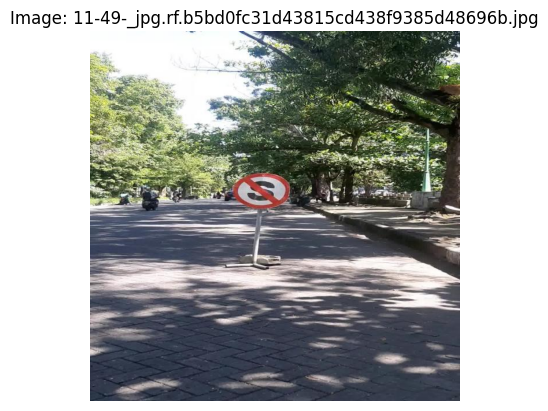

In [47]:
LabeledImage("11-49-_jpg.rf.b5bd0fc31d43815cd438f9385d48696b").show_image()

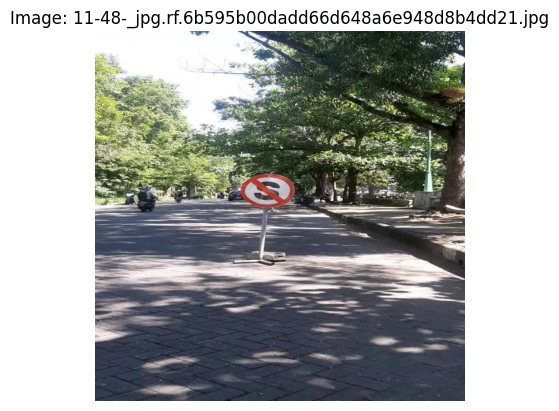

In [48]:
LabeledImage("11-48-_jpg.rf.6b595b00dadd66d648a6e948d8b4dd21").show_image()

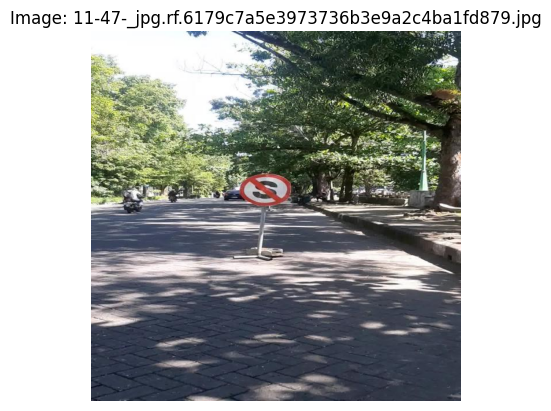

In [49]:
LabeledImage("11-47-_jpg.rf.6179c7a5e3973736b3e9a2c4ba1fd879").show_image()

In [59]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.9 MB/s eta 0:00:00


In [ ]:
import os
from IPython.display import display, HTML
from PIL import Image
import ipywidgets as widgets
from IPython.display import Image as IPImage

# 画像フォルダのパス（例: /content/images）
image_dir = './dataset/images'  # ここを変更してください

# 画像ファイル一覧を取得
image_files = sorted([
    f for f in os.listdir(image_dir)
    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))
])

# スライダーウィジェットの作成
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(image_files) - 1,
    step=1,
    description='画像番号:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)

# 表示用関数
def show_image(index):
    file_name = image_files[index]
    file_path = os.path.join(image_dir, file_name)

    # ファイル名をHTMLで太字表示
    display(HTML(f"<h4>ファイル名: {file_name}</h4>"))
    display(IPImage(filename=file_path))

# インタラクティブ表示
widgets.interact(show_image, index=slider)


In [ ]:
LabeledImage("1-150-_jpg.rf.de3b439e034b9be3bb00b98b9fdaf60c").show_image()

In [ ]:
import os
from IPython.display import display, HTML
import ipywidgets as widgets
from IPython.display import Image as IPImage

# パスの設定
base_path = './dataset'
image_dir = os.path.join(base_path, 'images')
label_dir = os.path.join(base_path, 'labels')

# 対象画像をフィルタリング
qualified_files = []

for fname in sorted(os.listdir(label_dir)):
    if not fname.endswith('.txt'):
        continue

    label_path = os.path.join(label_dir, fname)
    try:
        with open(label_path, 'r') as f:
            line = f.readline().strip()
            if not line:
                continue
            parts = line.split()
            if len(parts) != 5:
                continue
            label, x_center, y_center, width, height = map(float, parts)
            if width >= 0.7 or height >= 0.7:
                img_name = fname.replace('.txt', '.jpg')
                img_path = os.path.join(image_dir, img_name)
                if os.path.exists(img_path):
                    qualified_files.append((img_name, img_path))
    except Exception as e:
        print(f"Error reading {label_path}: {e}")

# スライダー
if not qualified_files:
    print("条件を満たす画像が見つかりませんでした。")
else:
    slider = widgets.IntSlider(
        value=0,
        min=0,
        max=len(qualified_files) - 1,
        step=1,
        description='画像番号:',
        continuous_update=False,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='80%')
    )

    def show_image(index):
        file_name, file_path = qualified_files[index]
        display(HTML(f"<h4>ファイル名: {file_name}</h4>"))
        display(IPImage(filename=file_path))

    widgets.interact(show_image, index=slider)


In [78]:
clean_images = [
    "1-150-_jpg.rf.de3b439e034b9be3bb00b98b9fdaf60c.jpg",
    "4-74-_jpg.rf.35b7a11f358e730eb87e383753ed7e10.jpg",
    "5-155-_jpg.rf.f1115c210a1f19bf554383b8e5269a6a.jpg",
    "6-143-_jpg.rf.751a998d3a3b729795d4ce7e14b479a5.jpg",
    "7-155-_jpg.rf.1d3ca7969bcca01b6dc4b96fc96e5d4b.jpg",
    "8-143-_jpg.rf.77c2040c4e531ef3fd9e19e28de7afd5.jpg",
    "9-87-_jpg.rf.0c729764a312b809e696680268980eb5.jpg",
    "10-155-_jpg.rf.7d5e9f2a92f7f91e8688c27fd0e193a0.jpg",
    "11-34-_jpg.rf.cfbd37c000ab152b709e0fdd976e3964.jpg",
    "12-129-_jpg.rf.ebc0d4f4affdef90012587ae9573b74e.jpg",
    "13-97-_jpg.rf.0d6f52913ec0ab12da95b7ea979ddd6b.jpg",
    "14-147-_jpg.rf.77318f71cf80b6330c03579da9d84c38.jpg",
    "15-70-_jpg.rf.c88b74eb4d450b5cb4edfd9f7a443b86.jpg",
    "16-94-_jpg.rf.bc70873ed351992c70310c70a16a4a1c.jpg",
    "17-155-_jpg.rf.75ebf615e81e6f07eee1431faf2167f8.jpg",
    "18-1-_jpg.rf.c0f43eb921fad2ef5c69b8b77c6263e7.jpg",
    "18-117-_jpg.rf.14a3358f013ba1ed908d27288914bcf2.jpg",
    "19-155-_jpg.rf.6316e46ddaf7e3abcf4b6afc6a779b8f.jpg",
    "20-153-_jpg.rf.1dfec0530b947373b30f923944570be6.jpg",
    "22-154-_jpg.rf.92b1d1bc526d561a1c8f37a633ac79e4.jpg",
    "23-2-_jpg.rf.ba5933950f921b25e0cec0cccde861e5.jpg",
    "24-152-_jpg.rf.c4ad056b105f3af0d7ff97b34521e016.jpg",
    "25-155-_jpg.rf.b147b9b11cb210714d77d22a4d97e309.jpg",
    "26-33-_jpg.rf.b5c8907f3b7b57e96be09ac49c479e44.jpg",
    "27-78-_jpg.rf.ddc36e0cd06160b1db43a5edd3e034aa.jpg",
    "28-155-_jpg.rf.77b0798e35f111c6d9b5c6b6f93b8069.jpg",
    "29-152-_jpg.rf.5c2026bcb44f2b7d634281776451a5a5.jpg",
    "30-42-_jpg.rf.17f5379b2d1757f0572ddbc9e898157b.jpg"
]
print(len(clean_images))

28


In [77]:
import os

# パスの設定
label_dir = './dataset/labels'

# ラベル i ∈ {1, ..., 40} に対する存在フラグを初期化（インデックス 0 は使わない）
label_flags = [False] * 41  # index 1 to 40

# 各アノテーションファイルを走査
for fname in os.listdir(label_dir):
    if not fname.endswith('.txt'):
        continue
    label_path = os.path.join(label_dir, fname)
    try:
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                label, x_center, y_center, width, height = map(float, parts)
                label = int(label)
                if 1 <= label <= 40 and (width >= 0.7 or height >= 0.7):
                    label_flags[label] = True
    except Exception as e:
        print(f"Error reading {label_path}: {e}")

# 結果の表示
for i in range(1, 41):
    status = "あり" if label_flags[i] else "なし"
    print(f"ラベル {i:2d}:     対象のバウンディングボックス {status}     ラベル名: {num_to_lab_ja[i-1]}")


ラベル  1:     対象のバウンディングボックス あり     ラベル名: 応急処置所
ラベル  2:     対象のバウンディングボックス あり     ラベル名: 子ども注意
ラベル  3:     対象のバウンディングボックス あり     ラベル名: 右カーブあり
ラベル  4:     対象のバウンディングボックス あり     ラベル名: 左カーブあり
ラベル  5:     対象のバウンディングボックス あり     ラベル名: 一時停止
ラベル  6:     対象のバウンディングボックス あり     ラベル名: 右折禁止
ラベル  7:     対象のバウンディングボックス あり     ラベル名: 左折禁止
ラベル  8:     対象のバウンディングボックス あり     ラベル名: 停止禁止
ラベル  9:     対象のバウンディングボックス あり     ラベル名: 進入禁止
ラベル 10:     対象のバウンディングボックス あり     ラベル名: 追い越し禁止
ラベル 11:     対象のバウンディングボックス あり     ラベル名: 駐車禁止
ラベル 12:     対象のバウンディングボックス あり     ラベル名: 転回禁止
ラベル 13:     対象のバウンディングボックス あり     ラベル名: 教会
ラベル 14:     対象のバウンディングボックス あり     ラベル名: 注意
ラベル 15:     対象のバウンディングボックス あり     ラベル名: ラウンドアバウト
ラベル 16:     対象のバウンディングボックス なし     ラベル名: 自転車専用通行帯
ラベル 17:     対象のバウンディングボックス あり     ラベル名: 最高速度30km/h
ラベル 18:     対象のバウンディングボックス あり     ラベル名: 最高速度40km/h
ラベル 19:     対象のバウンディングボックス あり     ラベル名: 左車線
ラベル 20:     対象のバウンディングボックス あり     ラベル名: 信号機あり
ラベル 21:     対象のバウンディングボックス あり     ラベル名: 重量制限10t
ラベル 22:     対象のバウンディングボックス あ